The notebook explains the preprocessing of climate variables available from DMI in .netcdf format

Importing relevant packages

In [1]:
import xarray as xr
import os
import rasterio
import rioxarray

Setting up the file directory

In [3]:
os.chdir(r'C:\Users\angelinkatula\Desktop\P8\climate_data')

Opening a netcdf file with the desired climate variable. In this example it is average wind speed

In [4]:
dset = xr.open_dataset(r"DMI_Klimaatlas_Grid_Middelvind_absolut_v2020b.nc")
print(dset)

<xarray.Dataset>
Dimensions:             (eastings: 452, northings: 354, nv: 2, time: 20)
Coordinates:
  * eastings            (eastings) float64 4.415e+05 4.425e+05 ... 8.925e+05
  * northings           (northings) float64 6.05e+06 6.050e+06 ... 6.402e+06
    longitude           (northings, eastings) float64 ...
    latitude            (northings, eastings) float64 ...
  * time                (time) datetime64[ns] 1996-01-16 ... 2086-07-01
Dimensions without coordinates: nv
Data variables:
    sfcWind_10_45       (time, northings, eastings) float32 ...
    sfcWind_50_45       (time, northings, eastings) float32 ...
    sfcWind_90_45       (time, northings, eastings) float32 ...
    sfcWind_10_85       (time, northings, eastings) float32 ...
    sfcWind_50_85       (time, northings, eastings) float32 ...
    sfcWind_90_85       (time, northings, eastings) float32 ...
    climatology_bounds  (time, nv) float64 ...
    UTM_Projection      |S1 ...
Attributes:
    Conventions:  CF1.7
    i

c:\Miniconda\envs\test1\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'sfcWind_10_45' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
c:\Miniconda\envs\test1\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'sfcWind_50_45' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
c:\Miniconda\envs\test1\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'sfcWind_90_45' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
c:\Miniconda\envs\test1\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'sfcWind_10_85' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
c:\Miniconda\envs\test1\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'sfcWind_50_

Showing the information about the dataset

In [5]:
dset.attrs

{'Conventions': 'CF1.7',
 'institution': 'DMI',
 'comment': 'Klimaatlasset er udarbejdet på baggrund af DMI’s egne data, internationale samarbejder og viden fra FN’s globale klimarapport, der offentliggøres med jævne mellemrum. Klimaatlas leverer ét samlet datagrundlag om fremtidens forventede nedbør, indtil det rammer overfladen, og havvand, indtil det rammer kysten. Klimaatlasset vil ikke i sig selv kunne fortælle noget om effekterne af vandet, der rammer kommunen, da data om for eksempel grundvandsspejl, kloakering, afværgeforanstaltninger og andre lokale forhold ikke er registreret i Klimaatlasset, men Klimaatlasset vil kunne være med til at kvantificere mængderne og pege på, hvor problemerne bliver størst. En videre effektanalyse, hvor eksempelvis vandspejl og kloakeringsforhold er med, skal udarbejdes efterfølgende på baggrund af bl.a. data fra Klimaatlasset og lokalspecifikke forhold. De gængse klimaparametrene er udregnet og samlet på kommune-, vandoplands- og kyststrækningsniv

Showing the list of variables withing the dataset

In [6]:
for varname, variable in dset.items():
    print(varname)

sfcWind_10_45
sfcWind_50_45
sfcWind_90_45
sfcWind_10_85
sfcWind_50_85
sfcWind_90_85
climatology_bounds
UTM_Projection


Choosing RCP 8.5 (50% procentile)

In [7]:
dset.sfcWind_50_85

<xarray.DataArray 'sfcWind_50_85' (time: 20, northings: 354, eastings: 452)>
[3200160 values with dtype=float32]
Coordinates:
  * eastings   (eastings) float64 4.415e+05 4.425e+05 ... 8.915e+05 8.925e+05
  * northings  (northings) float64 6.05e+06 6.050e+06 ... 6.402e+06 6.402e+06
    longitude  (northings, eastings) float64 ...
    latitude   (northings, eastings) float64 ...
  * time       (time) datetime64[ns] 1996-01-16 1996-04-16 ... 2086-07-01
Attributes:
    cell_methods:  time: mean ensemble-member: 50th percentile
    units:         m/s
    grid_mapping:  UTM_projection: northings eastings crsWGS84: latitude long...
    description:   pointwise 50th percentile among models of the field for th...

Renamning easting and northing into X and Y

In [8]:
xds = dset.rename_dims({"eastings": "x", "northings": "y"}).rename_vars({"eastings": "x", "northings": "y"}).set_coords(["x", "y"])

In [9]:
xds

<xarray.Dataset>
Dimensions:             (nv: 2, time: 20, x: 452, y: 354)
Coordinates:
  * x                   (x) float64 4.415e+05 4.425e+05 ... 8.915e+05 8.925e+05
  * y                   (y) float64 6.05e+06 6.050e+06 ... 6.402e+06 6.402e+06
    longitude           (y, x) float64 ...
    latitude            (y, x) float64 ...
  * time                (time) datetime64[ns] 1996-01-16 ... 2086-07-01
Dimensions without coordinates: nv
Data variables:
    sfcWind_10_45       (time, y, x) float32 ...
    sfcWind_50_45       (time, y, x) float32 ...
    sfcWind_90_45       (time, y, x) float32 ...
    sfcWind_10_85       (time, y, x) float32 ...
    sfcWind_50_85       (time, y, x) float32 ...
    sfcWind_90_85       (time, y, x) float32 ...
    climatology_bounds  (time, nv) float64 ...
    UTM_Projection      |S1 ...
Attributes:
    Conventions:  CF1.7
    institution:  DMI
    comment:      Klimaatlasset er udarbejdet på baggrund af DMI’s egne data,...
    version:      v2020b

Turning it into a raster layer saved in .tif format

In [10]:
xds["sfcWind_50_85"].rio.to_raster('sfcWind_50_85.tif')

Opening this raster dataset

In [11]:
sfcWind_50_85 = rioxarray.open_rasterio("sfcWind_50_85.tif")

Printing some information about it

In [12]:
print(sfcWind_50_85)

<xarray.DataArray (band: 20, y: 354, x: 452)>
[3200160 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * x            (x) float64 4.415e+05 4.425e+05 ... 8.915e+05 8.925e+05
  * y            (y) float64 6.05e+06 6.050e+06 ... 6.402e+06 6.402e+06
    spatial_ref  int32 0
Attributes:
    _FillValue:    1.0000000150474662e+30
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     sfcWind_50_85


The dataset contains 20 bands, where the future climate projection scenario RCP 8.5 for 2071-2100 is band number 20. Let's choose that band

In [13]:
wind_mean_future = sfcWind_50_85.sel(band=20)

Masking nodata values

In [14]:
wind_mean_future_valid = wind_mean_future.where(
    wind_mean_future != wind_mean_future.rio.nodata)

Plotting the map to visualize

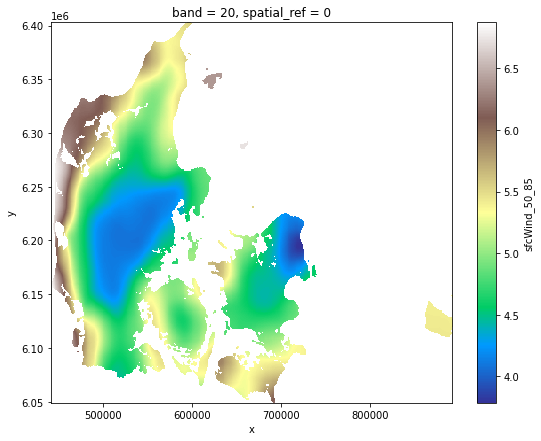

In [15]:
wind_mean_future_valid.plot.imshow(figsize=(9,7), cmap="terrain")

Saving that only band as a .tif file

In [16]:
wind_mean_future.rio.to_raster('wind_mean_future.tif')

Repeating the same process with any desired climate variable